In [2]:
import os
import re
import gc
import warnings
import numpy as np
import pandas as pd
import collections
warnings.filterwarnings("ignore")
from datetime import date 

#set max display in notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Show multiple output in console
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Reading the dataset 
df = pd.read_csv('/Users/kothaapuroop/Desktop/XN Project/202212.csv')
df.head()
df.shape
df.info()

,Time Stamp,Code,Event ID,Message Code,Event ID.1,Event Time,Ingest Time,Request ID,Source IP,HTTP Method,HTTP Url,HTTP Auth,HTTP Auth Hash,Resource,Resource Class,Resource Method,Organization,App,User,Entity,Timestamp Request,Timestamp Response
0,2022-12-25 03:24:57,DDV1_HTTP,10G1PX4TZ8L6UP4A89Z92RM5N,DDV1_HTTP,10G1PX4TZ8L6UP4A89Z92RM5N,2022-12-25T03:24:52.199611,2022-12-25T03:24:57.3103325Z,10G1PX4TZ8L6UP4A89Z92RM5N,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/a1ca...,API_KEY 6b50,5191d6faa9b002d0e2d3286627958342,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.197591,2022-12-25 03:24:52.199611
1,2022-12-25 03:24:57,DDV1_HTTP,1T8LKV94BYTDO1VIY4VHJXW9MO,DDV1_HTTP,1T8LKV94BYTDO1VIY4VHJXW9MO,2022-12-25T03:24:51.819338,2022-12-25T03:24:57.4229937Z,1T8LKV94BYTDO1VIY4VHJXW9MO,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/ac59...,API_KEY 6b50,5191d6faa9b002d0e2d3286627958342,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:51.817850,2022-12-25 03:24:51.819338
2,2022-12-25 03:24:57,DDV1_HTTP,16GMONO2UVTCT5UXDHC2GKWQX,DDV1_HTTP,16GMONO2UVTCT5UXDHC2GKWQX,2022-12-25T03:24:52.046172,2022-12-25T03:24:57.4229959Z,16GMONO2UVTCT5UXDHC2GKWQX,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/37df...,API_KEY 6b50,5191d6faa9b002d0e2d3286627958342,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.044870,2022-12-25 03:24:52.046172
3,2022-12-25 03:24:57,DDV1_HTTP,RC1WECTQISB33SSRC3NVJDX1,DDV1_HTTP,RC1WECTQISB33SSRC3NVJDX1,2022-12-25T03:24:52.309994,2022-12-25T03:24:57.4229963Z,RC1WECTQISB33SSRC3NVJDX1,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/4da0...,API_KEY 6b50,5191d6faa9b002d0e2d3286627958342,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.308694,2022-12-25 03:24:52.309994
4,2022-12-25 03:24:57,DDV1_HTTP,17X6VN1GN46IYTSPUY1H9P6TX,DDV1_HTTP,17X6VN1GN46IYTSPUY1H9P6TX,2022-12-25T03:24:51.791491,2022-12-25T03:24:57.6719103Z,17X6VN1GN46IYTSPUY1H9P6TX,NaN,GET,https://10.154.0.21/liveness_check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-25 03:24:51.790677,2022-12-25 03:24:51.791491


(19338600, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19338600 entries, 0 to 19338599
Data columns (total 22 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Time Stamp          object
 1   Code                object
 2   Event ID            object
 3   Message Code        object
 4   Event ID.1          object
 5   Event Time          object
 6   Ingest Time         object
 7   Request ID          object
 8   Source IP           object
 9   HTTP Method         object
 10  HTTP Url            object
 11  HTTP Auth           object
 12  HTTP Auth Hash      object
 13  Resource            object
 14  Resource Class      object
 15  Resource Method     object
 16  Organization        object
 17  App                 object
 18  User                object
 19  Entity              object
 20  Timestamp Request   object
 21  Timestamp Response  object
dtypes: object(22)
memory usage: 3.2+ GB


In [3]:
df['Event Time'] = pd.to_datetime(df['Event Time'], format='%Y-%m-%d %H:%M:%S%z')
df['Ingest Time'] = pd.to_datetime(df['Ingest Time'], format='%Y-%m-%d %H:%M:%S%z')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19338600 entries, 0 to 19338599
Data columns (total 22 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Time Stamp          object             
 1   Code                object             
 2   Event ID            object             
 3   Message Code        object             
 4   Event ID.1          object             
 5   Event Time          datetime64[ns]     
 6   Ingest Time         datetime64[ns, UTC]
 7   Request ID          object             
 8   Source IP           object             
 9   HTTP Method         object             
 10  HTTP Url            object             
 11  HTTP Auth           object             
 12  HTTP Auth Hash      object             
 13  Resource            object             
 14  Resource Class      object             
 15  Resource Method     object             
 16  Organization        object             
 17  App                 objec

,Time Stamp,Code,Event ID,Message Code,Event ID.1,Event Time,Ingest Time,Request ID,Source IP,HTTP Method,HTTP Url,HTTP Auth,HTTP Auth Hash,Resource,Resource Class,Resource Method,Organization,App,User,Entity,Timestamp Request,Timestamp Response
0,2022-12-25 03:24:57,DDV1_HTTP,10G1PX4TZ8L6UP4A89Z92RM5N,DDV1_HTTP,10G1PX4TZ8L6UP4A89Z92RM5N,2022-12-25 03:24:52.199611,2022-12-25 03:24:57.310332500+00:00,10G1PX4TZ8L6UP4A89Z92RM5N,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/a1ca...,API_KEY 6b50,5191d6faa9b002d0e2d3286627958342,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.197591,2022-12-25 03:24:52.199611
1,2022-12-25 03:24:57,DDV1_HTTP,1T8LKV94BYTDO1VIY4VHJXW9MO,DDV1_HTTP,1T8LKV94BYTDO1VIY4VHJXW9MO,2022-12-25 03:24:51.819338,2022-12-25 03:24:57.422993700+00:00,1T8LKV94BYTDO1VIY4VHJXW9MO,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/ac59...,API_KEY 6b50,5191d6faa9b002d0e2d3286627958342,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:51.817850,2022-12-25 03:24:51.819338
2,2022-12-25 03:24:57,DDV1_HTTP,16GMONO2UVTCT5UXDHC2GKWQX,DDV1_HTTP,16GMONO2UVTCT5UXDHC2GKWQX,2022-12-25 03:24:52.046172,2022-12-25 03:24:57.422995900+00:00,16GMONO2UVTCT5UXDHC2GKWQX,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/37df...,API_KEY 6b50,5191d6faa9b002d0e2d3286627958342,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.044870,2022-12-25 03:24:52.046172
3,2022-12-25 03:24:57,DDV1_HTTP,RC1WECTQISB33SSRC3NVJDX1,DDV1_HTTP,RC1WECTQISB33SSRC3NVJDX1,2022-12-25 03:24:52.309994,2022-12-25 03:24:57.422996300+00:00,RC1WECTQISB33SSRC3NVJDX1,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/4da0...,API_KEY 6b50,5191d6faa9b002d0e2d3286627958342,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.308694,2022-12-25 03:24:52.309994
4,2022-12-25 03:24:57,DDV1_HTTP,17X6VN1GN46IYTSPUY1H9P6TX,DDV1_HTTP,17X6VN1GN46IYTSPUY1H9P6TX,2022-12-25 03:24:51.791491,2022-12-25 03:24:57.671910300+00:00,17X6VN1GN46IYTSPUY1H9P6TX,NaN,GET,https://10.154.0.21/liveness_check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-25 03:24:51.790677,2022-12-25 03:24:51.791491


In [4]:
# # Truncate microseconds from the datetime strings
# df['Timestamp Request'] = df['Timestamp Request'].str[:-7]
# df['Timestamp Response'] = df['Timestamp Response'].str[:-7]

# Convert the dtypes of the columns
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])
df['Timestamp Request'] = pd.to_datetime(df['Timestamp Request'])
df['Timestamp Response'] = pd.to_datetime(df['Timestamp Response'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19338600 entries, 0 to 19338599
Data columns (total 22 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Time Stamp          datetime64[ns]     
 1   Code                object             
 2   Event ID            object             
 3   Message Code        object             
 4   Event ID.1          object             
 5   Event Time          datetime64[ns]     
 6   Ingest Time         datetime64[ns, UTC]
 7   Request ID          object             
 8   Source IP           object             
 9   HTTP Method         object             
 10  HTTP Url            object             
 11  HTTP Auth           object             
 12  HTTP Auth Hash      object             
 13  Resource            object             
 14  Resource Class      object             
 15  Resource Method     object             
 16  Organization        object             
 17  App                 objec

,Time Stamp,Code,Event ID,Message Code,Event ID.1,Event Time,Ingest Time,Request ID,Source IP,HTTP Method,HTTP Url,HTTP Auth,HTTP Auth Hash,Resource,Resource Class,Resource Method,Organization,App,User,Entity,Timestamp Request,Timestamp Response
0,2022-12-25 03:24:57,DDV1_HTTP,10G1PX4TZ8L6UP4A89Z92RM5N,DDV1_HTTP,10G1PX4TZ8L6UP4A89Z92RM5N,2022-12-25 03:24:52.199611,2022-12-25 03:24:57.310332500+00:00,10G1PX4TZ8L6UP4A89Z92RM5N,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/a1ca...,API_KEY 6b50,5191d6faa9b002d0e2d3286627958342,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.197591,2022-12-25 03:24:52.199611
1,2022-12-25 03:24:57,DDV1_HTTP,1T8LKV94BYTDO1VIY4VHJXW9MO,DDV1_HTTP,1T8LKV94BYTDO1VIY4VHJXW9MO,2022-12-25 03:24:51.819338,2022-12-25 03:24:57.422993700+00:00,1T8LKV94BYTDO1VIY4VHJXW9MO,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/ac59...,API_KEY 6b50,5191d6faa9b002d0e2d3286627958342,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:51.817850,2022-12-25 03:24:51.819338
2,2022-12-25 03:24:57,DDV1_HTTP,16GMONO2UVTCT5UXDHC2GKWQX,DDV1_HTTP,16GMONO2UVTCT5UXDHC2GKWQX,2022-12-25 03:24:52.046172,2022-12-25 03:24:57.422995900+00:00,16GMONO2UVTCT5UXDHC2GKWQX,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/37df...,API_KEY 6b50,5191d6faa9b002d0e2d3286627958342,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.044870,2022-12-25 03:24:52.046172
3,2022-12-25 03:24:57,DDV1_HTTP,RC1WECTQISB33SSRC3NVJDX1,DDV1_HTTP,RC1WECTQISB33SSRC3NVJDX1,2022-12-25 03:24:52.309994,2022-12-25 03:24:57.422996300+00:00,RC1WECTQISB33SSRC3NVJDX1,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/4da0...,API_KEY 6b50,5191d6faa9b002d0e2d3286627958342,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.308694,2022-12-25 03:24:52.309994
4,2022-12-25 03:24:57,DDV1_HTTP,17X6VN1GN46IYTSPUY1H9P6TX,DDV1_HTTP,17X6VN1GN46IYTSPUY1H9P6TX,2022-12-25 03:24:51.791491,2022-12-25 03:24:57.671910300+00:00,17X6VN1GN46IYTSPUY1H9P6TX,NaN,GET,https://10.154.0.21/liveness_check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-25 03:24:51.790677,2022-12-25 03:24:51.791491


In [5]:
columns_to_drop = ['Code', 'Event ID.1', 'HTTP Auth', 'HTTP Auth Hash']
df = df.drop(columns_to_drop, axis=1)

In [6]:
df['Response_time'] = df['Timestamp Response'] - df['Timestamp Request']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19338600 entries, 0 to 19338599
Data columns (total 19 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Time Stamp          datetime64[ns]     
 1   Event ID            object             
 2   Message Code        object             
 3   Event Time          datetime64[ns]     
 4   Ingest Time         datetime64[ns, UTC]
 5   Request ID          object             
 6   Source IP           object             
 7   HTTP Method         object             
 8   HTTP Url            object             
 9   Resource            object             
 10  Resource Class      object             
 11  Resource Method     object             
 12  Organization        object             
 13  App                 object             
 14  User                object             
 15  Entity              object             
 16  Timestamp Request   datetime64[ns]     
 17  Timestamp Response  datet

,Time Stamp,Event ID,Message Code,Event Time,Ingest Time,Request ID,Source IP,HTTP Method,HTTP Url,Resource,Resource Class,Resource Method,Organization,App,User,Entity,Timestamp Request,Timestamp Response,Response_time
0,2022-12-25 03:24:57,10G1PX4TZ8L6UP4A89Z92RM5N,DDV1_HTTP,2022-12-25 03:24:52.199611,2022-12-25 03:24:57.310332500+00:00,10G1PX4TZ8L6UP4A89Z92RM5N,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/a1ca...,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.197591,2022-12-25 03:24:52.199611,0 days 00:00:00.002020
1,2022-12-25 03:24:57,1T8LKV94BYTDO1VIY4VHJXW9MO,DDV1_HTTP,2022-12-25 03:24:51.819338,2022-12-25 03:24:57.422993700+00:00,1T8LKV94BYTDO1VIY4VHJXW9MO,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/ac59...,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:51.817850,2022-12-25 03:24:51.819338,0 days 00:00:00.001488
2,2022-12-25 03:24:57,16GMONO2UVTCT5UXDHC2GKWQX,DDV1_HTTP,2022-12-25 03:24:52.046172,2022-12-25 03:24:57.422995900+00:00,16GMONO2UVTCT5UXDHC2GKWQX,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/37df...,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.044870,2022-12-25 03:24:52.046172,0 days 00:00:00.001302
3,2022-12-25 03:24:57,RC1WECTQISB33SSRC3NVJDX1,DDV1_HTTP,2022-12-25 03:24:52.309994,2022-12-25 03:24:57.422996300+00:00,RC1WECTQISB33SSRC3NVJDX1,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/4da0...,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.308694,2022-12-25 03:24:52.309994,0 days 00:00:00.001300
4,2022-12-25 03:24:57,17X6VN1GN46IYTSPUY1H9P6TX,DDV1_HTTP,2022-12-25 03:24:51.791491,2022-12-25 03:24:57.671910300+00:00,17X6VN1GN46IYTSPUY1H9P6TX,NaN,GET,https://10.154.0.21/liveness_check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-25 03:24:51.790677,2022-12-25 03:24:51.791491,0 days 00:00:00.000814


In [31]:
# Create a function to categorize time into different time categories
def categorize_time(timestamp):
    hour = timestamp.hour
    
    if 5 <= hour < 9:
        return 'Early Morning'
    elif 9 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the categorize_time function to the 'Time Stamp' column and create a new column 'Time Category'
df['Time Category'] = df['Time Stamp'].apply(categorize_time)

# Display the updated dataframe
df.head()

,Time Stamp,Event ID,Message Code,Event Time,Ingest Time,Request ID,Source IP,HTTP Method,HTTP Url,Resource,Resource Class,Resource Method,Organization,App,User,Entity,Timestamp Request,Timestamp Response,Response_time,HourOfDay,Time Category
0,2022-12-25 03:24:57,10G1PX4TZ8L6UP4A89Z92RM5N,DDV1_HTTP,2022-12-25 03:24:52.199611,2022-12-25 03:24:57.310332500+00:00,10G1PX4TZ8L6UP4A89Z92RM5N,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/a1ca...,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.197591,2022-12-25 03:24:52.199611,0 days 00:00:00.002020,3,Night
1,2022-12-25 03:24:57,1T8LKV94BYTDO1VIY4VHJXW9MO,DDV1_HTTP,2022-12-25 03:24:51.819338,2022-12-25 03:24:57.422993700+00:00,1T8LKV94BYTDO1VIY4VHJXW9MO,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/ac59...,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:51.817850,2022-12-25 03:24:51.819338,0 days 00:00:00.001488,3,Night
2,2022-12-25 03:24:57,16GMONO2UVTCT5UXDHC2GKWQX,DDV1_HTTP,2022-12-25 03:24:52.046172,2022-12-25 03:24:57.422995900+00:00,16GMONO2UVTCT5UXDHC2GKWQX,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/37df...,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.044870,2022-12-25 03:24:52.046172,0 days 00:00:00.001302,3,Night
3,2022-12-25 03:24:57,RC1WECTQISB33SSRC3NVJDX1,DDV1_HTTP,2022-12-25 03:24:52.309994,2022-12-25 03:24:57.422996300+00:00,RC1WECTQISB33SSRC3NVJDX1,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/4da0...,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.308694,2022-12-25 03:24:52.309994,0 days 00:00:00.001300,3,Night
4,2022-12-25 03:24:57,17X6VN1GN46IYTSPUY1H9P6TX,DDV1_HTTP,2022-12-25 03:24:51.791491,2022-12-25 03:24:57.671910300+00:00,17X6VN1GN46IYTSPUY1H9P6TX,NaN,GET,https://10.154.0.21/liveness_check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-25 03:24:51.790677,2022-12-25 03:24:51.791491,0 days 00:00:00.000814,3,Night


In [32]:
# Calculate summary statistics
mean_duration = df['Response_time'].mean()
median_duration = df['Response_time'].median()
std_duration = df['Response_time'].std()

In [79]:
mean_duration
median_duration
std_duration

Timedelta('0 days 00:00:00.146569684')

Timedelta('0 days 00:00:00.096599')

Timedelta('0 days 00:00:00.588863208')

(array([1.9336319e+07, 1.8880000e+03, 2.0900000e+02, 1.0400000e+02,
        2.9000000e+01, 2.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        3.6000000e+01, 2.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 6.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]),
 array([1.55000000e-04, 1.54536684e+01, 3.09071817e+01, 4.63606951e+01,
        6.18142085e+01, 7.72677218e+01, 9.27212352e+01, 1.08174749e+02,
        1.23628262e+02, 1.39081775e+02, 1.54535289e+02, 1.69988802e+02,
        1.85442315e+02, 2.00895829e+02, 2.16349342e+02, 2.31802856e+02,
        2.47256369e+02, 2.62709882e+02, 2.78163396e+02, 2.93616909e+02,
        3.09070422e+02, 3.24523936e+02, 3.39977449e+02, 3.55430962e+02,
        3.70884476e+02, 3.86337989e+02, 4.01791503e+

Text(0.5, 0, 'Response_time (minutes)')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Response_time')

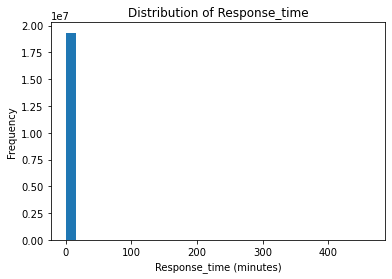

In [39]:
import matplotlib.pyplot as plt
# Plot the distribution of durations
plt.hist(df['Response_time'].dt.total_seconds(), bins=30)  # Convert durations to minutes for better visualization
plt.xlabel('Response_time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Response_time')
plt.show()

In [43]:
max(df.Response_time)

Timedelta('0 days 00:07:43.605556')

In [44]:
min(df.Response_time)

Timedelta('0 days 00:00:00.000155')

In [45]:
new_df = df[['HourOfDay', 'Time Category', 'Request ID', 'Organization', 'Event Time']].copy()
new_df.shape
new_df.head()
new_df.info()

(19338600, 5)

,HourOfDay,Time Category,Request ID,Organization,Event Time
0,3,Night,10G1PX4TZ8L6UP4A89Z92RM5N,lara.andrade-org,2022-12-25 03:24:52.199611
1,3,Night,1T8LKV94BYTDO1VIY4VHJXW9MO,lara.andrade-org,2022-12-25 03:24:51.819338
2,3,Night,16GMONO2UVTCT5UXDHC2GKWQX,lara.andrade-org,2022-12-25 03:24:52.046172
3,3,Night,RC1WECTQISB33SSRC3NVJDX1,lara.andrade-org,2022-12-25 03:24:52.309994
4,3,Night,17X6VN1GN46IYTSPUY1H9P6TX,NaN,2022-12-25 03:24:51.791491


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19338600 entries, 0 to 19338599
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   HourOfDay      int64         
 1   Time Category  object        
 2   Request ID     object        
 3   Organization   object        
 4   Event Time     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 737.7+ MB


In [48]:
# Calculate the count of request IDs for each hour
hourly_counts = new_df.groupby(['HourOfDay', new_df['Event Time'].dt.date])['Request ID'].count()
hourly_counts.head()

HourOfDay  Event Time
0          2022-11-30      180
           2022-12-01    24767
           2022-12-02    11140
           2022-12-03    29630
           2022-12-04    29415
Name: Request ID, dtype: int64

In [51]:
hourly_counts_df = hourly_counts.reset_index().rename(columns={'Request ID': 'Request Count'})

hourly_counts_df.head()

,HourOfDay,Event Time,Request Count
0,0,2022-11-30,180
1,0,2022-12-01,24767
2,0,2022-12-02,11140
3,0,2022-12-03,29630
4,0,2022-12-04,29415


In [53]:
mean = hourly_counts_df['Request Count'].mean()
median = hourly_counts_df['Request Count'].median()
std = hourly_counts_df['Request Count'].std()

mean
median
std

25957.85234899329

24588.0

11469.550040259617

In [52]:
hourly_counts_df[hourly_counts_df.HourOfDay==1]

,HourOfDay,Event Time,Request Count
32,1,2022-12-01,26518
33,1,2022-12-02,11127
34,1,2022-12-03,29730
35,1,2022-12-04,31031
36,1,2022-12-05,31280
37,1,2022-12-06,12507
38,1,2022-12-07,10558
39,1,2022-12-08,20256
40,1,2022-12-09,6010
41,1,2022-12-10,7452


In [59]:
hourly_counts_df['Value Category'] = hourly_counts_df['Request Count'].apply(lambda x: 'High value' if x > 25000 else 'Low value')
hourly_counts_df.head()

,HourOfDay,Event Time,Request Count,Value Category
0,0,2022-11-30,180,Low value
1,0,2022-12-01,24767,Low value
2,0,2022-12-02,11140,Low value
3,0,2022-12-03,29630,High value
4,0,2022-12-04,29415,High value


In [63]:
hourly_counts_df['Value Category'].value_counts()

Low value     392
High value    353
Name: Value Category, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming you have the 'hourly_counts_df' dataframe with columns: HourOfDay, Event Time, Request Count, Value Category

# Convert 'Event Time' column to datetime type
hourly_counts_df['Event Time'] = pd.to_datetime(hourly_counts_df['Event Time'])

# Sort the dataframe by 'Event Time'
hourly_counts_df.sort_values('Event Time', inplace=True)

# Create lagged features
hourly_counts_df['Prev_HourOfDay'] = hourly_counts_df['HourOfDay'].shift(1)
hourly_counts_df['Prev_Value_Category'] = hourly_counts_df['Value Category'].shift(1)

# Drop rows with missing values
hourly_counts_df.dropna(inplace=True)

# Split the data into training and test sets
X = hourly_counts_df[['Prev_HourOfDay']]
y = hourly_counts_df['Value Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the value category for the next HourOfDay
X_next_hour = hourly_counts_df['HourOfDay'].max() + 1  # Assuming the next hour is the maximum HourOfDay value + 1
y_pred = model.predict([[X_next_hour]])

# Print the prediction
print("Prediction for the next hour:")
print(y_pred)

# Evaluate the model on the test set
y_pred_test = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_test))


LogisticRegression()

Prediction for the next hour:
['Low value']
Classification Report:
              precision    recall  f1-score   support

  High value       0.00      0.00      0.00        70
   Low value       0.53      1.00      0.69        79

    accuracy                           0.53       149
   macro avg       0.27      0.50      0.35       149
weighted avg       0.28      0.53      0.37       149



In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming you have the 'hourly_counts_df' dataframe with columns: HourOfDay, Event Time, Request Count, Value Category

# Convert 'Event Time' column to datetime type
hourly_counts_df['Event Time'] = pd.to_datetime(hourly_counts_df['Event Time'])

# Sort the dataframe by 'Event Time'
hourly_counts_df.sort_values('Event Time', inplace=True)

# Create lagged features
hourly_counts_df['Prev_HourOfDay'] = hourly_counts_df['HourOfDay'].shift(1)
hourly_counts_df['Prev_Value_Category'] = hourly_counts_df['Value Category'].shift(1)

# Drop rows with missing values
hourly_counts_df.dropna(inplace=True)

# Split the data into training and test sets
X = hourly_counts_df[['Prev_HourOfDay']]
y = hourly_counts_df['Value Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the value category for the next HourOfDay
X_next_hour = hourly_counts_df['HourOfDay'].max() + 1  # Assuming the next hour is the maximum HourOfDay value + 1
y_pred = model.predict([[X_next_hour]])

# Print the prediction
print("Prediction for the next hour:")
print(y_pred)

# Evaluate the model on the test set
y_pred_test = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_test))


RandomForestClassifier()

Prediction for the next hour:
['High value']
Classification Report:
              precision    recall  f1-score   support

  High value       0.31      0.21      0.25        71
   Low value       0.44      0.56      0.49        78

    accuracy                           0.40       149
   macro avg       0.37      0.39      0.37       149
weighted avg       0.38      0.40      0.38       149



In [67]:
# Prepare the feature matrix X and the target variable y
X = hourly_counts_df[['HourOfDay', 'Request Count']]
y = hourly_counts_df['Next Hour Value Category']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


LogisticRegression()

              precision    recall  f1-score   support

  High value       0.48      0.66      0.56        70
   Low value       0.56      0.38      0.45        79

    accuracy                           0.51       149
   macro avg       0.52      0.52      0.50       149
weighted avg       0.52      0.51      0.50       149



In [55]:
# Calculate the count of request IDs for each hour and day combination
hourly_counts = new_df.groupby(['HourOfDay', new_df['Event Time'].dt.date])['Request ID'].count()

# Set a threshold for high request count
threshold = 25000  # Adjust the threshold as per your requirements

# Create a new column 'Request Category' indicating high or low request hour
new_df['Request Category'] = new_df.apply(lambda row: 'High' if hourly_counts[row['HourOfDay'], row['Event Time'].date()] >= threshold else 'Low', axis=1)

# Display the updated dataframe
print(new_df.head())

   HourOfDay Time Category                  Request ID      Organization                 Event Time Request Category
0          3         Night   10G1PX4TZ8L6UP4A89Z92RM5N  lara.andrade-org 2022-12-25 03:24:52.199611              Low
1          3         Night  1T8LKV94BYTDO1VIY4VHJXW9MO  lara.andrade-org 2022-12-25 03:24:51.819338              Low
2          3         Night   16GMONO2UVTCT5UXDHC2GKWQX  lara.andrade-org 2022-12-25 03:24:52.046172              Low
3          3         Night    RC1WECTQISB33SSRC3NVJDX1  lara.andrade-org 2022-12-25 03:24:52.309994              Low
4          3         Night   17X6VN1GN46IYTSPUY1H9P6TX               NaN 2022-12-25 03:24:51.791491              Low


June 19 2023 3:45

## EDA

In [80]:
df.head()

,Time Stamp,Event ID,Message Code,Event Time,Ingest Time,Request ID,Source IP,HTTP Method,HTTP Url,Resource,Resource Class,Resource Method,Organization,App,User,Entity,Timestamp Request,Timestamp Response,Response_time,HourOfDay,Time Category
0,2022-12-25 03:24:57,10G1PX4TZ8L6UP4A89Z92RM5N,DDV1_HTTP,2022-12-25 03:24:52.199611,2022-12-25 03:24:57.310332500+00:00,10G1PX4TZ8L6UP4A89Z92RM5N,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/a1ca...,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.197591,2022-12-25 03:24:52.199611,0 days 00:00:00.002020,3,Night
1,2022-12-25 03:24:57,1T8LKV94BYTDO1VIY4VHJXW9MO,DDV1_HTTP,2022-12-25 03:24:51.819338,2022-12-25 03:24:57.422993700+00:00,1T8LKV94BYTDO1VIY4VHJXW9MO,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/ac59...,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:51.817850,2022-12-25 03:24:51.819338,0 days 00:00:00.001488,3,Night
2,2022-12-25 03:24:57,16GMONO2UVTCT5UXDHC2GKWQX,DDV1_HTTP,2022-12-25 03:24:52.046172,2022-12-25 03:24:57.422995900+00:00,16GMONO2UVTCT5UXDHC2GKWQX,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/37df...,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.044870,2022-12-25 03:24:52.046172,0 days 00:00:00.001302,3,Night
3,2022-12-25 03:24:57,RC1WECTQISB33SSRC3NVJDX1,DDV1_HTTP,2022-12-25 03:24:52.309994,2022-12-25 03:24:57.422996300+00:00,RC1WECTQISB33SSRC3NVJDX1,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/4da0...,TaskResource.get,TaskResource.get,TaskResource.get,lara.andrade-org,lara.andrade-org_app,NaN,lara.andrade-org_app,2022-12-25 03:24:52.308694,2022-12-25 03:24:52.309994,0 days 00:00:00.001300,3,Night
4,2022-12-25 03:24:57,17X6VN1GN46IYTSPUY1H9P6TX,DDV1_HTTP,2022-12-25 03:24:51.791491,2022-12-25 03:24:57.671910300+00:00,17X6VN1GN46IYTSPUY1H9P6TX,NaN,GET,https://10.154.0.21/liveness_check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-25 03:24:51.790677,2022-12-25 03:24:51.791491,0 days 00:00:00.000814,3,Night


Text(0.5, 0, 'Date')

Text(0, 0.5, 'Request Frequency')

Text(0.5, 1.0, 'Frequency of Requests Over Time')

(array([19325., 19327., 19331., 19335., 19339., 19343., 19347., 19351.,
        19355., 19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

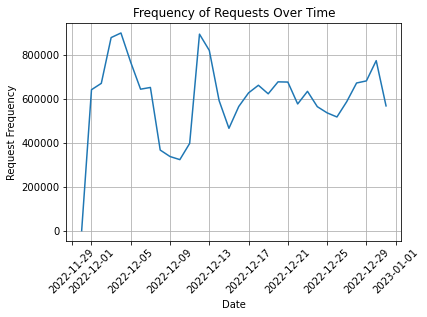

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the date and count the frequency of requests per date
request_freq = df['Timestamp Request'].dt.date.value_counts().sort_index()

# Create a line plot of the request frequency
plt.plot(request_freq.index, request_freq.values)
plt.xlabel('Date')
plt.ylabel('Request Frequency')
plt.title('Frequency of Requests Over Time')
plt.xticks(rotation=45)
plt.grid(True)

# Display the graph
plt.show()

(array([19325., 19326., 19327., 19328., 19329., 19330., 19331., 19332.,
        19333., 19334., 19335., 19336., 19337., 19338., 19339., 19340.,
        19341., 19342., 19343., 19344., 19345., 19346., 19347., 19348.,
        19349., 19350., 19351., 19352., 19353., 19354., 19355., 19356.,
        19357., 19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Request Frequency')

Text(0.5, 1.0, 'Frequency of Requests Over Time')

Text(2022-12-31, 604331.25, 'Avg: 604331.25')

Text(2022-12-04, 901945, 'Max: 901845')

Text(2022-11-30, 80, 'Min: 180')

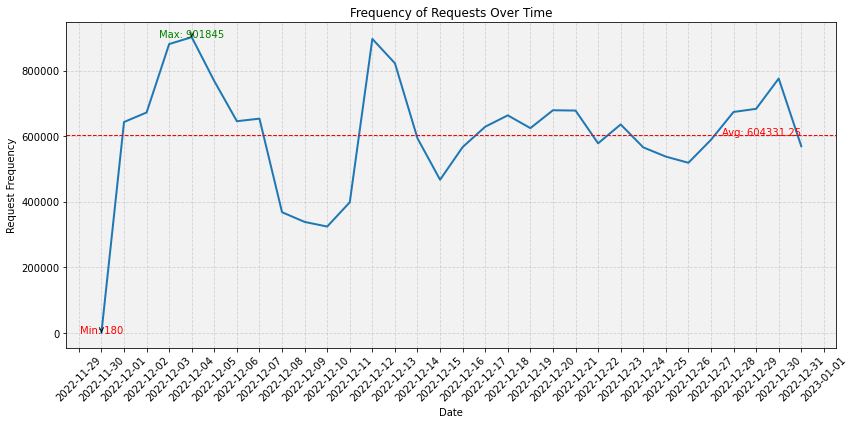

In [82]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming your DataFrame is named 'df' with a 'Timestamp Request' column
# Convert 'Timestamp Request' column to datetime if it's not already
df['Timestamp Request'] = pd.to_datetime(df['Timestamp Request'])

# Extract the date and count the frequency of requests per date
request_freq = df['Timestamp Request'].dt.date.value_counts().sort_index()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the request frequency as a line plot
ax.plot(request_freq.index, request_freq.values, linewidth=2)

# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Request Frequency')
ax.set_title('Frequency of Requests Over Time')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

# Add a background color to the plot
ax.set_facecolor('#f2f2f2')

# Add a horizontal line at the average request frequency
avg_freq = request_freq.mean()
ax.axhline(avg_freq, color='r', linestyle='--', linewidth=1)
ax.text(request_freq.index[-1], avg_freq, f'Avg: {avg_freq:.2f}', color='r', ha='right')

# Add annotations for the highest and lowest frequency points
max_freq_date = request_freq.idxmax()
max_freq_value = request_freq.max()
min_freq_date = request_freq.idxmin()
min_freq_value = request_freq.min()
ax.annotate(f'Max: {max_freq_value}', xy=(max_freq_date, max_freq_value),
            xytext=(max_freq_date, max_freq_value + 100), color='g', ha='center',
            arrowprops=dict(facecolor='g', arrowstyle='->'))
ax.annotate(f'Min: {min_freq_value}', xy=(min_freq_date, min_freq_value),
            xytext=(min_freq_date, min_freq_value - 100), color='r', ha='center',
            arrowprops=dict(facecolor='r', arrowstyle='->'))

# Display the graph
plt.tight_layout()
plt.show()


<Figure size 720x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f8938521b50>,
 [Text(-1.0575696455148567, 0.30256643053316506, 'GET'),
  Text(1.0421968566896576, -0.35188877774972815, 'POST'),
  Text(1.0983681176664508, -0.0598955598843323, 'HEAD'),
  Text(1.099968986860708, -0.008260020861215458, 'PATCH'),
  Text(1.0999999999977796, -2.210126418324226e-06, 'OPTIONS')],
 [Text(-0.5768561702808309, 0.16503623483627183, '91.1%'),
  Text(0.5684710127398132, -0.1919393333180335, '7.4%'),
  Text(0.5991098823635186, -0.032670305391453984, '1.3%'),
  Text(0.5999830837422043, -0.00450546592429934, '0.2%'),
  Text(0.5999999999987888, -1.2055235009041232e-06, '0.0%')])

(-1.106645301639909, 1.1003164429352337, -1.10599420743958, 1.1075352322188912)

Text(0.5, 1.0, 'Top 5 HTTP Methods Distribution')

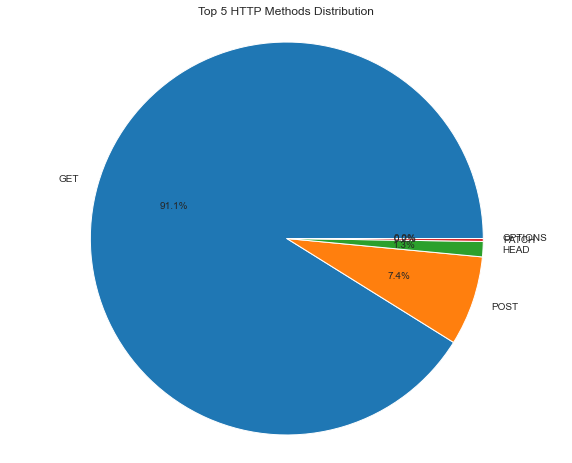

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df' with an 'HTTP Method' column
# Count the number of calls of each type
call_counts = df['HTTP Method'].value_counts()

# Select the top 5 HTTP methods
top_methods = call_counts.head(5)

# Plot a pie chart of the top 5 HTTP methods
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.pie(top_methods, labels=top_methods.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 5 HTTP Methods Distribution')
plt.show()

<AxesSubplot:>

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Number of Requests')

Text(0.5, 1.0, 'Distribution of Requests Across Days')

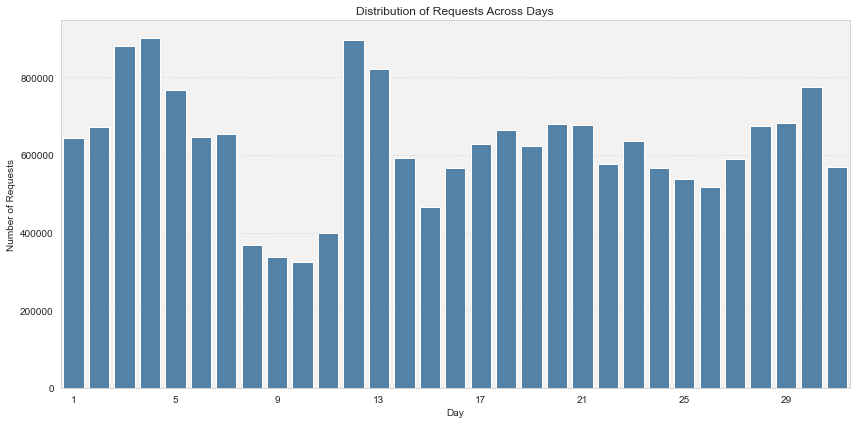

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming your DataFrame is named 'df' with a 'Timestamp Request' column
# Convert 'Timestamp Request' column to datetime if it's not already
df['Timestamp Request'] = pd.to_datetime(df['Timestamp Request'])

# Extract the day from the 'Timestamp Request' column
df['Day'] = df['Timestamp Request'].dt.day

# Count the number of requests per day
requests_per_day = df['Day'].value_counts().sort_index()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the requests distribution across days as a bar plot
sns.barplot(x=requests_per_day.index, y=requests_per_day.values, color='steelblue', ax=ax)

# Set labels and title
ax.set_xlabel('Day')
ax.set_ylabel('Number of Requests')
ax.set_title('Distribution of Requests Across Days')

# Customize the tick frequency of x-axis for better readability
ax.xaxis.set_major_locator(plt.MaxNLocator(8))

# Add gridlines
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Add a background color to the plot
ax.set_facecolor('#f2f2f2')

# Display the graph
plt.tight_layout()
plt.show()


<AxesSubplot:>

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Number of Requests (thousands)')

Text(0.5, 1.0, 'Distribution of Requests Across Days of the Week')

Text(0.0, 2807386.0, '2,807,386')

Text(1.0, 2735476.0, '2,735,476')

Text(2.0, 2598521.0, '2,598,521')

Text(3.0, 2739236.0, '2,739,236')

Text(4.0, 2988299.0, '2,988,299')

Text(5.0, 2968767.0, '2,968,767')

Text(6.0, 2500915.0, '2,500,915')

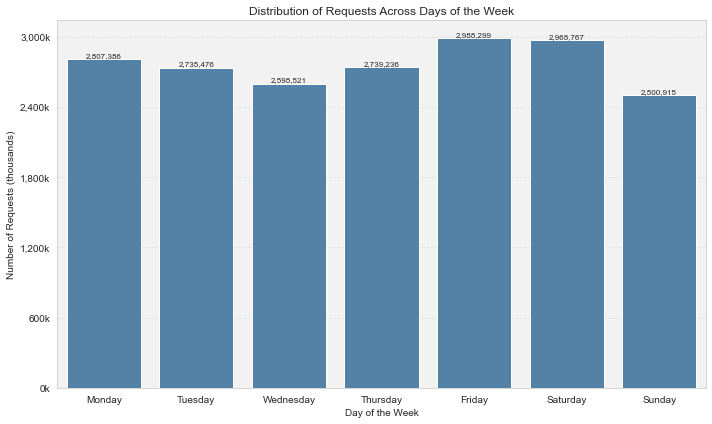

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import calendar
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Assuming your DataFrame is named 'df' with a 'Timestamp Request' column
# Convert 'Timestamp Request' column to datetime if it's not already
df['Timestamp Request'] = pd.to_datetime(df['Timestamp Request'])

# Extract the day of the week from the 'Timestamp Request' column
df['Day of Week'] = df['Timestamp Request'].dt.day_name()

# Count the number of requests per day of the week
requests_per_day = df['Day of Week'].value_counts().reindex(calendar.day_name)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the requests distribution across days of the week as a bar plot
sns.barplot(x=requests_per_day.index, y=requests_per_day.values, color='steelblue', ax=ax)

# Set labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Requests (thousands)')
ax.set_title('Distribution of Requests Across Days of the Week')

# Customize the tick frequency of y-axis for better readability
ax.yaxis.set_major_locator(plt.MaxNLocator(6))

# Format y-axis labels to represent values in thousands (k)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}k'.format(x * 1e-3)))

# Add gridlines
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Add a background color to the plot
ax.set_facecolor('#f2f2f2')

# Annotate the bars with the exact count values
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8)

# Display the graph
plt.tight_layout()
plt.show()

<AxesSubplot:>

Text(0.5, 0, 'Organization')

Text(0, 0.5, 'Number of Requests (thousands)')

Text(0.5, 1.0, 'Distribution of Requests Across Top 10 Organizations')

[Text(0, 0, '9360f6cc-a025-47db-bbf2-b4046f27f8a6'),
 Text(1, 0, '6b1faf26-cb89-4cc0-a158-d494e1c664cd'),
 Text(2, 0, 'lara.andrade-org'),
 Text(3, 0, 'f00716b5-e120-4699-b827-791d6e2a2565'),
 Text(4, 0, 'bcd5ea8f-0fea-41cd-9bab-16582ca49666'),
 Text(5, 0, 'pjgs.sousa-org'),
 Text(6, 0, '09340114-ae3e-452e-9c7a-191f52d34da7'),
 Text(7, 0, 'benfica-org'),
 Text(8, 0, '859d79a1-fa30-4a69-9947-78f62ba4b12e'),
 Text(9, 0, '4f82e3b0-40a4-47b5-bfc3-12c701f31fa2')]

Text(0.0, 6763635.0, '6,763,635')

Text(1.0, 3459373.0, '3,459,373')

Text(2.0, 1716059.0, '1,716,059')

Text(3.0, 1248021.0, '1,248,021')

Text(4.0, 1186108.0, '1,186,108')

Text(5.0, 846667.0, '846,667')

Text(6.0, 768552.0, '768,552')

Text(7.0, 391228.0, '391,228')

Text(8.0, 230664.0, '230,664')

Text(9.0, 134209.0, '134,209')

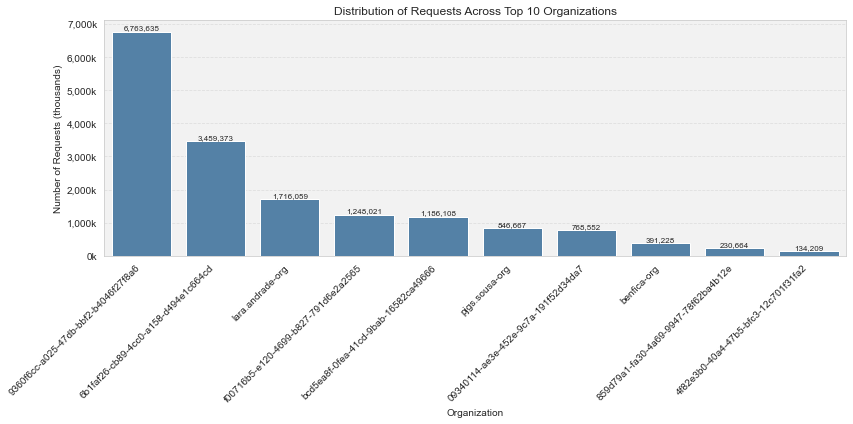

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Assuming your DataFrame is named 'df' with an 'Organization' column
# Count the number of requests per organization
requests_per_organization = df['Organization'].value_counts().nlargest(10)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the requests distribution across top 10 organizations as a bar plot
sns.barplot(x=requests_per_organization.index, y=requests_per_organization.values, color='steelblue', ax=ax)

# Set labels and title
ax.set_xlabel('Organization')
ax.set_ylabel('Number of Requests (thousands)')
ax.set_title('Distribution of Requests Across Top 10 Organizations')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Customize the tick format of y-axis labels to represent values in thousands (k)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}k'.format(x * 1e-3)))

# Add gridlines
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Add a background color to the plot
ax.set_facecolor('#f2f2f2')

# Annotate the bars with the exact count values
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8)

# Display the graph
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Time Stamp'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Time Category Distribution Across Days')

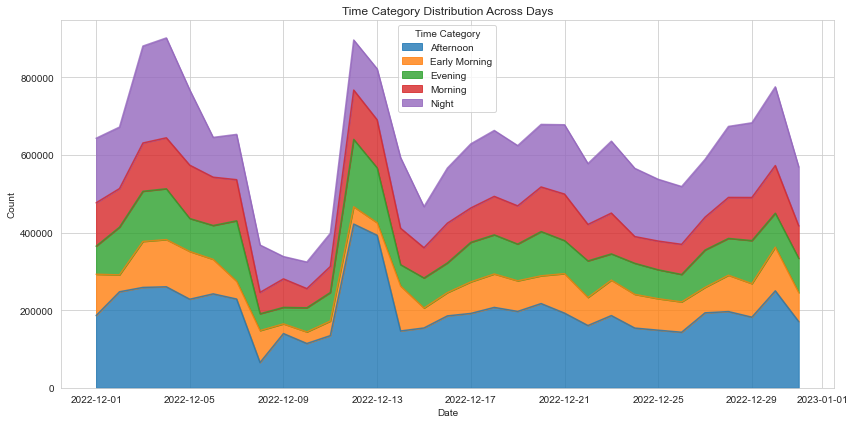

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' with a 'Time Category' column and a 'Time Stamp' column
# Convert 'Time Stamp' column to datetime if it's not already
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])

# Group the data by date and time category and count the occurrences
time_category_distribution = df.groupby([df['Time Stamp'].dt.date, 'Time Category']).size().unstack(fill_value=0)

# Create a stacked area plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked area chart using seaborn
sns.set_palette('viridis')
time_category_distribution.plot.area(ax=ax, alpha=0.8)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Time Category Distribution Across Days')

# Display the legend
ax.legend(title='Time Category')

# Display the graph
plt.tight_layout()
plt.show()

<AxesSubplot:>

Text(0.5, 0, 'Time Category')

Text(0, 0.5, 'Number of Requests (thousands)')

Text(0.5, 1.0, 'Distribution of Requests Across Time Categories')

Text(0.0, 6197849.0, '6,197,849')

Text(1.0, 4804642.0, '4,804,642')

Text(2.0, 3055109.0, '3,055,109')

Text(3.0, 2893923.0, '2,893,923')

Text(4.0, 2387077.0, '2,387,077')

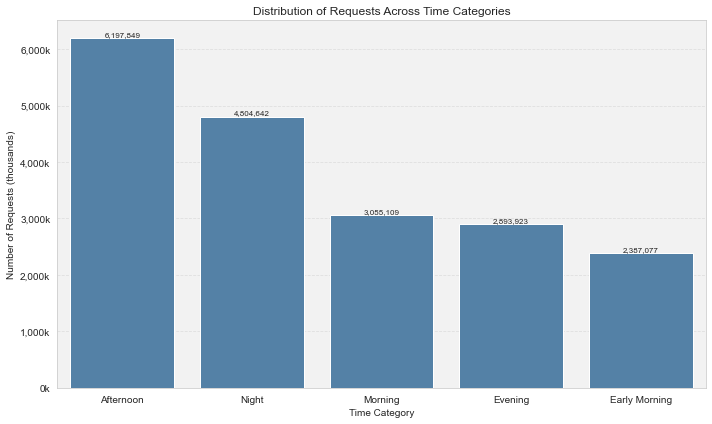

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Assuming your DataFrame is named 'df' with a 'Time Category' column
# Count the number of requests per time category
requests_per_time_category = df['Time Category'].value_counts()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the requests distribution across time categories as a bar plot
sns.barplot(x=requests_per_time_category.index, y=requests_per_time_category.values, color='steelblue', ax=ax)

# Set labels and title
ax.set_xlabel('Time Category')
ax.set_ylabel('Number of Requests (thousands)')
ax.set_title('Distribution of Requests Across Time Categories')

# Customize the tick format of y-axis labels to represent values in thousands (k)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}k'.format(x * 1e-3)))

# Add gridlines
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Add a background color to the plot
ax.set_facecolor('#f2f2f2')

# Annotate the bars with the exact count values
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8)

# Display the graph
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='Time Stamp'>

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Time Categories Across Days')

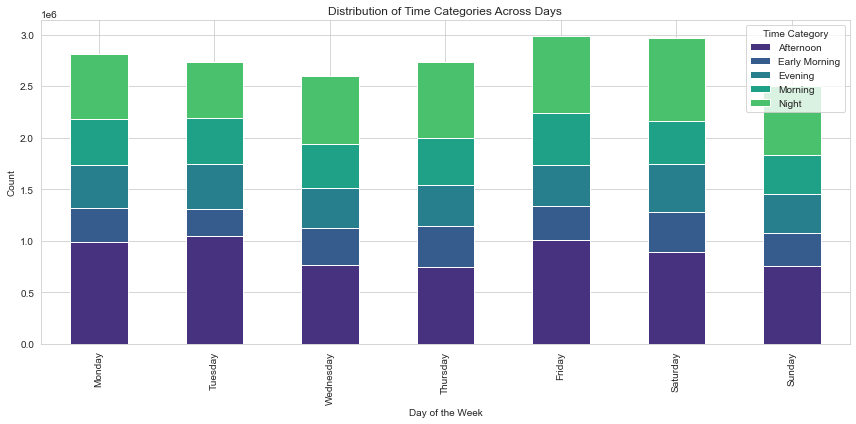

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' with a 'Time Category' column and a 'Time Stamp' column
# Convert 'Time Stamp' column to datetime if it's not already
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])

# Group the data by time category and count the occurrences per day
time_category_distribution = df.groupby([df['Time Stamp'].dt.day_name(), 'Time Category']).size().unstack(fill_value=0)

# Reorder the days of the week for proper sorting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time_category_distribution = time_category_distribution.reindex(day_order)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the distribution of time categories as a stacked bar chart
time_category_distribution.plot.bar(stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Count')
ax.set_title('Distribution of Time Categories Across Days')

# Display the legend
ax.legend(title='Time Category')

# Display the graph
plt.tight_layout()
plt.show()



<AxesSubplot:xlabel='Time Stamp'>

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Count (thousands)')

Text(0.5, 1.0, 'Distribution of Time Categories Across Days')

[Text(0, 0.0, '0k'),
 Text(0, 500000.0, '500k'),
 Text(0, 1000000.0, '1000k'),
 Text(0, 1500000.0, '1500k'),
 Text(0, 2000000.0, '2000k'),
 Text(0, 2500000.0, '2500k'),
 Text(0, 3000000.0, '3000k'),
 Text(0, 3500000.0, '3500k')]

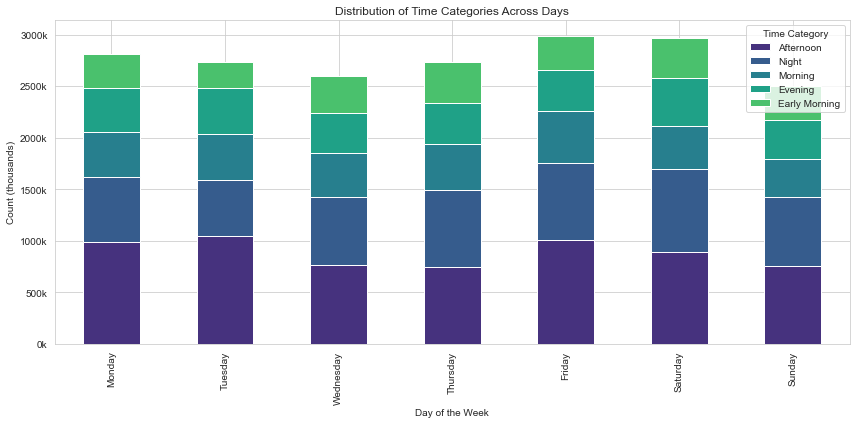

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' with a 'Time Category' column and a 'Time Stamp' column
# Convert 'Time Stamp' column to datetime if it's not already
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])

# Group the data by time category and count the occurrences
time_category_counts = df['Time Category'].value_counts()

# Order the time categories in descending order based on the count of requests
time_category_order = time_category_counts.index

# Group the data by time category and day of the week, and count the occurrences
time_category_distribution = df.groupby([df['Time Stamp'].dt.day_name(), 'Time Category']).size().unstack(fill_value=0)

# Reorder the days of the week for proper sorting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time_category_distribution = time_category_distribution.reindex(day_order)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the distribution of time categories as a stacked bar chart
time_category_distribution[time_category_order].plot.bar(stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Count (thousands)')
ax.set_title('Distribution of Time Categories Across Days')

# Convert y-axis labels from 1e6 to thousands (k)
ax.set_yticklabels(['{:.0f}k'.format(x * 1e-3) for x in ax.get_yticks()])

# Display the legend
ax.legend(title='Time Category')

# Display the graph
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='Time Stamp'>

Text(0.5, 0, 'Week Number')

Text(0, 0.5, 'Number of Requests (thousands)')

Text(0.5, 1.0, 'Distribution of Requests Across Weeks')

[Text(0, 0.0, '0k'),
 Text(0, 1000000.0, '1000k'),
 Text(0, 2000000.0, '2000k'),
 Text(0, 3000000.0, '3000k'),
 Text(0, 4000000.0, '4000k'),
 Text(0, 5000000.0, '5000k')]

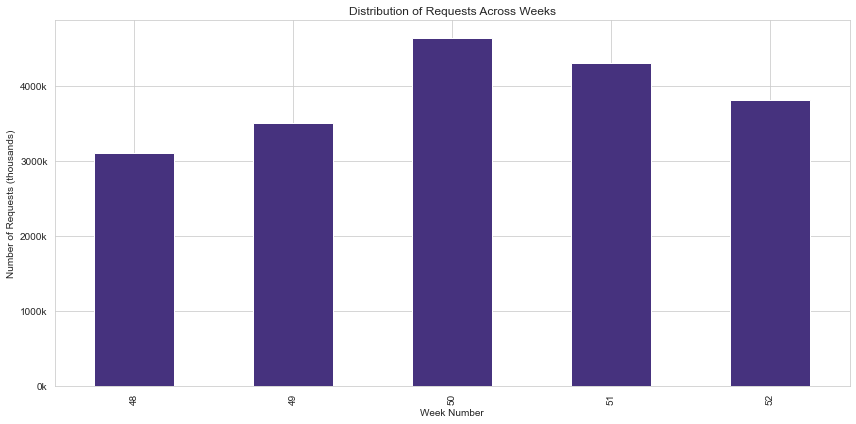

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' with a 'Time Stamp' column
# Convert 'Time Stamp' column to datetime if it's not already
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])

# Group the data by week number and count the occurrences
requests_per_week = df.groupby(df['Time Stamp'].dt.week).size()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the distribution of requests across weeks
requests_per_week.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Week Number')
ax.set_ylabel('Number of Requests (thousands)')
ax.set_title('Distribution of Requests Across Weeks')

# Convert y-axis labels from 1e6 to thousands (k)
ax.set_yticklabels(['{:.0f}k'.format(x * 1e-3) for x in ax.get_yticks()])

# Display the graph
plt.tight_layout()
plt.show()


<AxesSubplot:>

Text(0.5, 0, 'Hour of the Day')

Text(0, 0.5, 'Number of Requests (thousands)')

Text(0.5, 1.0, 'Distribution of Requests Across Hours of the Day')

[Text(0, 0.0, '0k'),
 Text(0, 200000.0, '200k'),
 Text(0, 400000.0, '400k'),
 Text(0, 600000.0, '600k'),
 Text(0, 800000.0, '800k'),
 Text(0, 1000000.0, '1000k'),
 Text(0, 1200000.0, '1200k')]

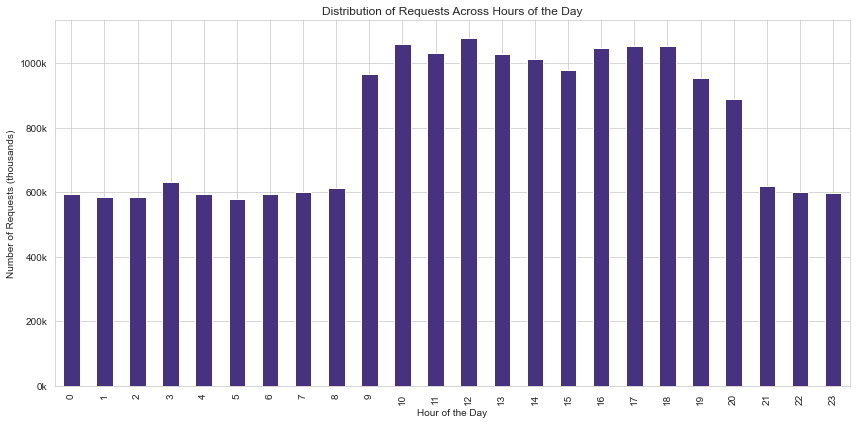

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' with an 'HourOfDay' column
# Convert 'HourOfDay' column to numeric if it's not already
df['HourOfDay'] = pd.to_numeric(df['HourOfDay'])

# Group the data by hour of the day and count the occurrences
requests_per_hour = df['HourOfDay'].value_counts().sort_index()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the distribution of requests across hours of the day
requests_per_hour.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Requests (thousands)')
ax.set_title('Distribution of Requests Across Hours of the Day')

# Convert y-axis labels from 1e6 to thousands (k)
ax.set_yticklabels(['{:.0f}k'.format(x * 1e-3) for x in ax.get_yticks()])

# Display the graph
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='Response Time'>

Text(0.5, 0, 'Response Time (seconds)')

Text(0.5, 1.0, 'Distribution of Response Time')

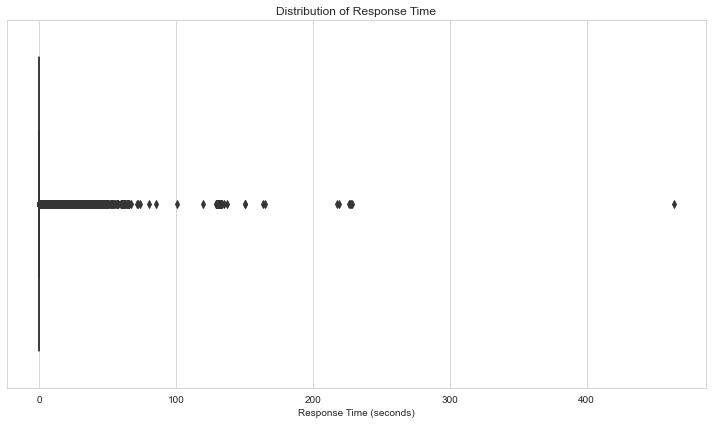

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' with a 'Timestamp Response' column
# Convert 'Timestamp Response' column to datetime if it's not already
df['Timestamp Response'] = pd.to_datetime(df['Timestamp Response'])

# Calculate the response time in seconds
df['Response Time'] = (df['Timestamp Response'] - df['Timestamp Request']).dt.total_seconds()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the box plot of response time
sns.boxplot(x=df['Response Time'], ax=ax)

# Set labels and title
ax.set_xlabel('Response Time (seconds)')
ax.set_title('Distribution of Response Time')

# Display the graph
plt.tight_layout()
plt.show()
